# Importing Necessary Libraries
To begin our project, we need to import the essential Python libraries for data manipulation, visualization, and analysis:

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

# Step 1: Data Selection
For this project, my chosen ZIP code is **01950**. Since this ZIP code is not part of the dataset, I’ve decided to include **Set A** in my analysis. This will provide additional data for a more robust analysis.

In [254]:
df = pd.read_csv('Clean_Data.csv')

# Filter the dataset where it only includes Set A and zip code 01950
filtered_df = df[(df['Set'] == 'A') | (df['zipcode'] == 1950)]
filtered_df.head()

,Set,zipcode,price_sold,zestimate,bedroom,bathroom,area,year,parking,lot,sold_date,price_list_f,date_list,price_list,tax,tax_assessment,walk,bike,school,heating_baseboard_dummy,heating_forced_water_dummy,heating_forced_air_dummy,heating_natural_gas_dummy,heating_other_dummy,heating_central_air_dummy,heating_gas_connected_dummy,cooling_central_air_dummy,cooling_ductless_dummy,cooling_window_units_dummy,cooling_wall_units_dummy,cooling_other_dummy,cooling_none_dummy,bedroom_6_plus,bathroom_6_plus
0,A,1075,320000.0,326100.0,3,2,1060.0,1963,4.0,0.22,2024-07-15,329999.0,2024-05-12,329999.0,4444.0,253200.0,35.0,31.0,6.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
1,A,1075,338000.0,334600.0,3,1,1239.0,1950,1.0,0.25,2024-09-26,340000.0,2024-08-25,340000.0,4700.0,267800.0,18.0,21.0,6.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,A,1075,400000.0,400400.0,4,2,1482.0,1955,4.0,0.32,2024-09-05,355000.0,2024-07-11,355000.0,4709.0,268300.0,3.0,24.0,6.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,A,1075,396900.0,400500.0,3,2,1440.0,2000,2.0,0.57,2024-08-23,399900.0,2024-05-30,399900.0,7345.0,418500.0,25.0,31.0,6.0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0
4,A,1075,615000.0,625800.0,4,3,2516.0,1987,2.0,0.57,2024-07-26,637500.0,2024-06-03,637500.0,8749.0,498500.0,6.0,10.0,6.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


# Step 2: Data Transformation
This section involves two key data transformations to ensure that all the data is ready for exploratory data analysis:
1. **Calculate the age of each house**: Subtract the `year` column from the current year (2024).
2. **Calculate the number of days a house was on the market**: Subtract the `date_list` from the `sold_date`.

In [ ]:
# Add a new column 'HouseAge' by subtracting the 'year' column from 2024
df['HouseAge (years)'] = 2024 - df['year']

df = df.drop(columns=['year'])

In [ ]:
df['sold_date'] = pd.to_datetime(df['sold_date'])
df['date_list'] = pd.to_datetime(df['date_list'])

# Calculate the total days on market and add it as a new column
df['DaysOnMarket (days)'] = (df['sold_date'] - df['date_list']).dt.days

df = df.drop(columns=['sold_date', 'date_list'])

df.head(10)

,Set,zipcode,price_sold,zestimate,bedroom,bathroom,area,parking,lot,price_list_f,price_list,tax,tax_assessment,walk,bike,school,heating_baseboard_dummy,heating_forced_water_dummy,heating_forced_air_dummy,heating_natural_gas_dummy,heating_other_dummy,heating_central_air_dummy,heating_gas_connected_dummy,cooling_central_air_dummy,cooling_ductless_dummy,cooling_window_units_dummy,cooling_wall_units_dummy,cooling_other_dummy,cooling_none_dummy,bedroom_6_plus,bathroom_6_plus,HouseAge (years),DaysOnMarket (days)
0,A,1075,320000.0,326100.0,3,2,1060.0,4.0,0.22,329999.0,329999.0,4444.0,253200.0,35.0,31.0,6.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,61,64
1,A,1075,338000.0,334600.0,3,1,1239.0,1.0,0.25,340000.0,340000.0,4700.0,267800.0,18.0,21.0,6.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,74,32
2,A,1075,400000.0,400400.0,4,2,1482.0,4.0,0.32,355000.0,355000.0,4709.0,268300.0,3.0,24.0,6.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,69,56
3,A,1075,396900.0,400500.0,3,2,1440.0,2.0,0.57,399900.0,399900.0,7345.0,418500.0,25.0,31.0,6.0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,24,85
4,A,1075,615000.0,625800.0,4,3,2516.0,2.0,0.57,637500.0,637500.0,8749.0,498500.0,6.0,10.0,6.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,37,53
5,A,1075,599728.0,603900.0,5,4,3791.0,2.0,0.57,589500.0,589500.0,7510.0,427900.0,32.0,38.0,6.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,56,35
6,A,1075,589400.0,576400.0,4,2,3077.0,2.0,1.12,589400.0,589400.0,8418.0,473700.0,5.0,9.0,6.0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,62,35
7,A,1075,415000.0,447100.0,5,2,1772.0,2.0,1.30,425000.0,425000.0,5578.0,313900.0,20.0,29.0,6.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,74,51
8,A,1075,560000.0,562600.0,3,3,1958.0,2.0,3.90,560000.0,560000.0,6181.0,352200.0,14.0,22.0,6.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,73
9,A,1507,225000.0,228100.0,1,1,896.0,3.0,0.22,225000.0,225000.0,2492.0,204800.0,0.0,16.0,5.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,94,19


# Step 3: Exploratory Data Analysis (EDA)

This section involves several steps to clean, analyze, and prepare the data for further analysis:

1. **Data Cleaning**: Irrelevant columns such as `zestimate`, `price_list_f`, and `price_list` are removed to focus on meaningful variables for the analysis.

2. **Correlation Analysis**: A correlation matrix is calculated for all numeric columns to identify relationships between features. The correlation matrix is visualized using a heatmap to highlight strongly correlated variables and patterns in the dataset.

3. **Descriptive Statistics**: Descriptive statistics such as mean, standard deviation, minimum, maximum, and quartiles are calculated for all numeric columns. This provides insights into the distribution and range of each variable.

4. **Outlier Detection and Removal**: The IQR (Interquartile Range) method is used to detect and remove outliers from the `tax`, `area`, and `lot` columns. Values outside of 1.5 times the IQR from the lower and upper quartiles are considered outliers and removed from the dataset to ensure a more robust analysis.

5. **Visualizing Outliers**: After outlier removal, histograms are plotted for `tax`, `area`, and `lot` to visualize the distributions and confirm that extreme values have been effectively removed.


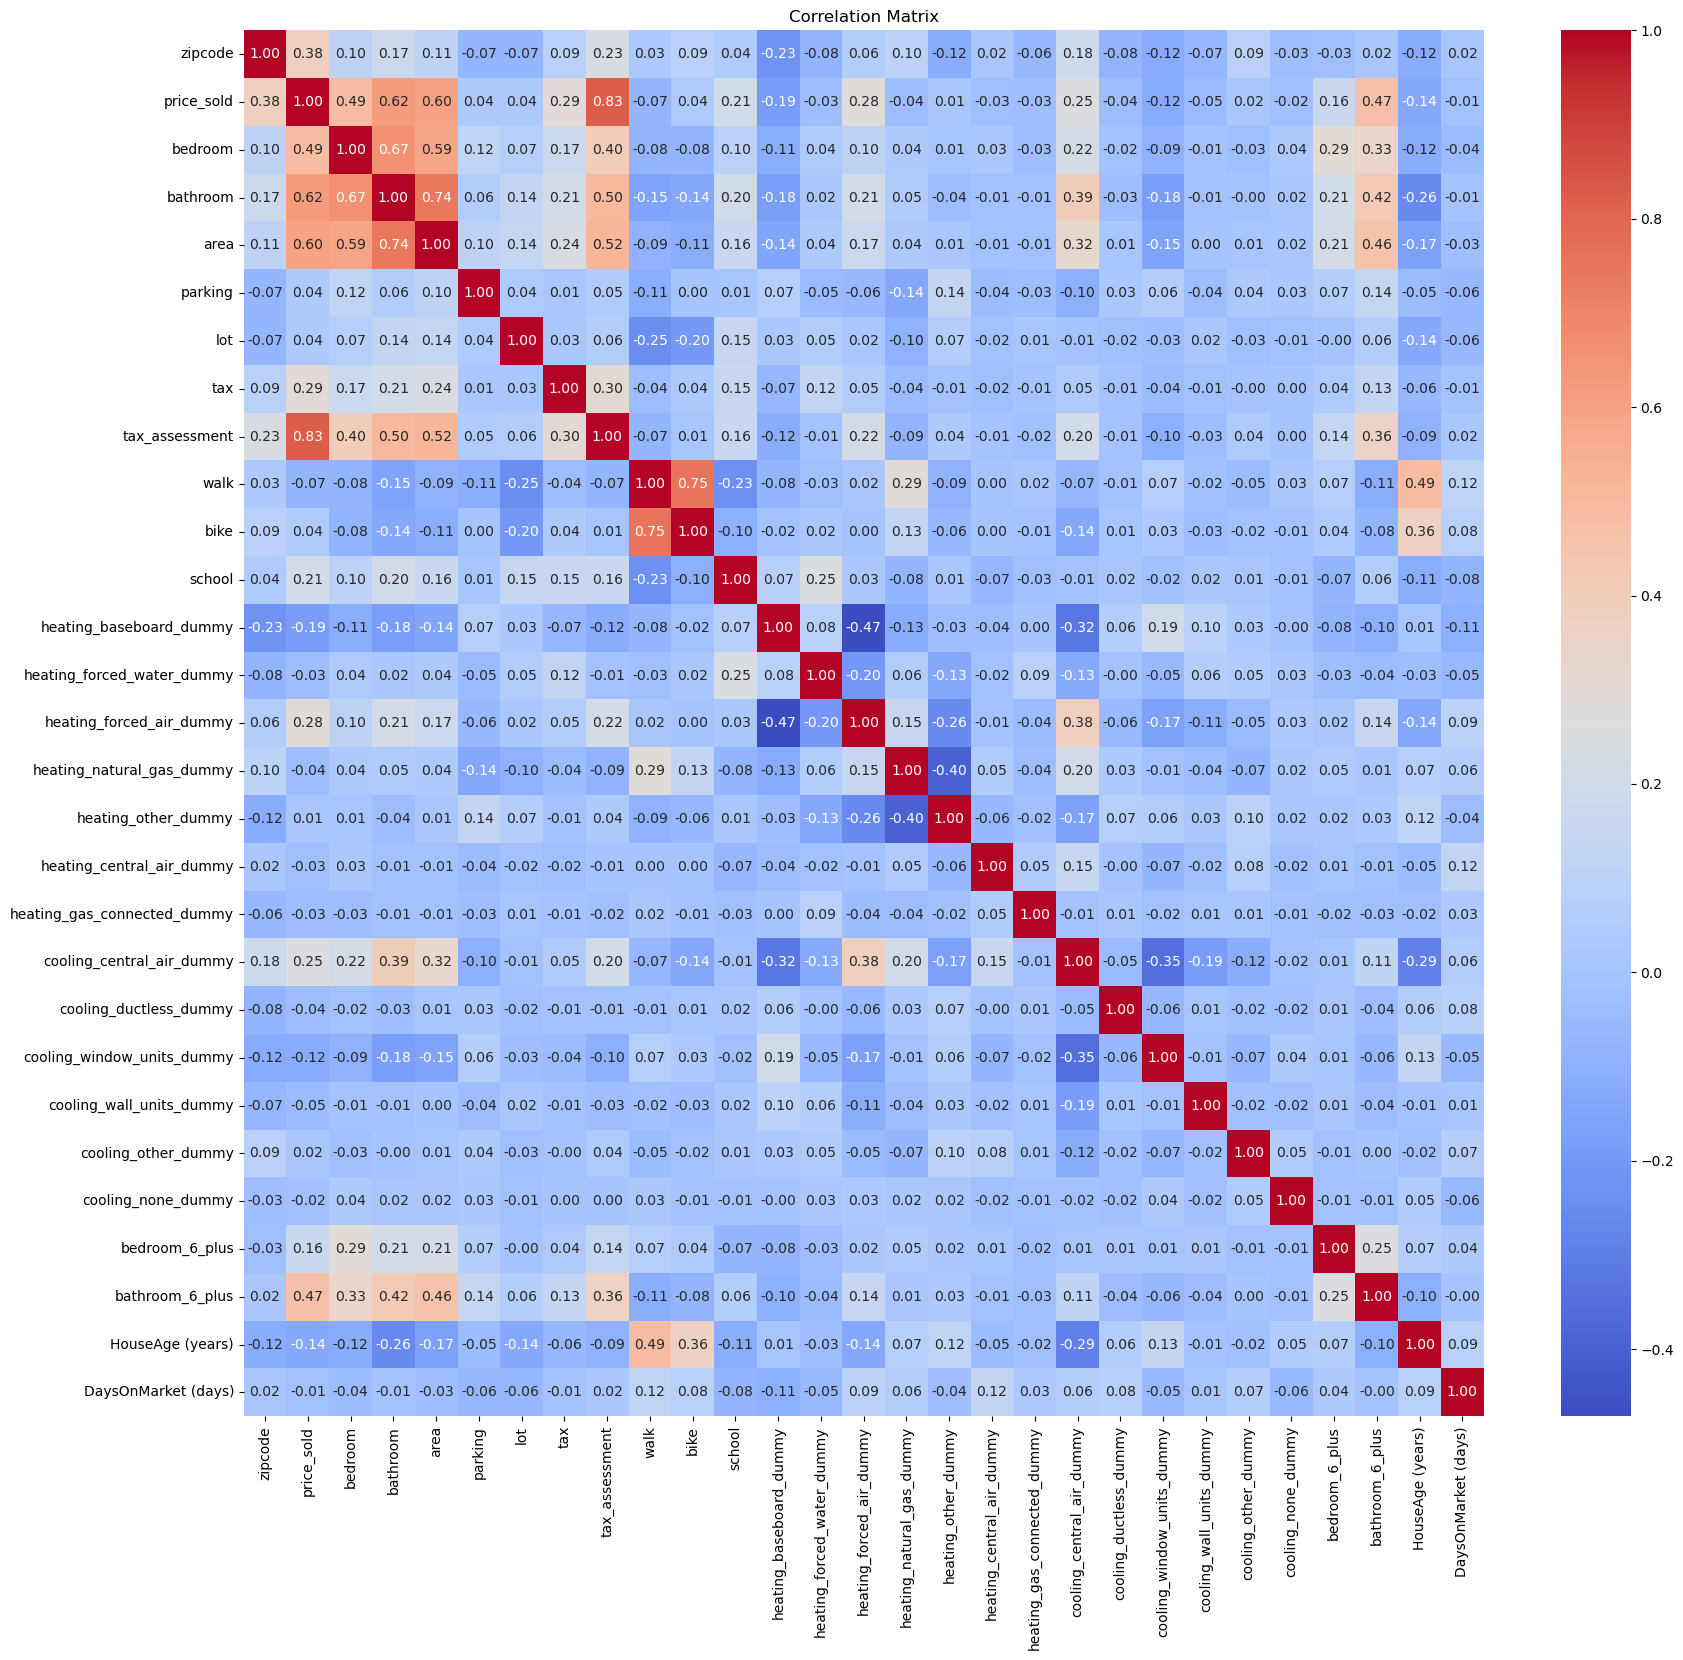

In [ ]:
df = df.drop(columns=['zestimate'])
df = df.drop(columns=['price_list_f'])
df = df.drop(columns=['price_list'])
df.head()

# Numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
df.describe()

,zipcode,price_sold,bedroom,bathroom,area,parking,lot,tax,tax_assessment,walk,bike,school,heating_baseboard_dummy,heating_forced_water_dummy,heating_forced_air_dummy,heating_natural_gas_dummy,heating_other_dummy,heating_central_air_dummy,heating_gas_connected_dummy,cooling_central_air_dummy,cooling_ductless_dummy,cooling_window_units_dummy,cooling_wall_units_dummy,cooling_other_dummy,cooling_none_dummy,bedroom_6_plus,bathroom_6_plus,HouseAge (years),DaysOnMarket (days)
count,1076.000000,1.076000e+03,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1.076000e+03,1076.000000,1076.000000,1075.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.00000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000
mean,10348.970260,1.076914e+06,3.521375,2.678439,2455.683086,2.224033,0.815400,9204.427509,5.993081e+05,27.956905,31.261887,5.680372,0.305762,0.063197,0.395911,0.421933,0.431227,0.05948,0.029740,0.523234,0.047398,0.125465,0.049257,0.105948,0.006506,0.013011,0.024164,63.153346,352.491636
std,20209.470697,1.254108e+06,0.969540,1.255588,1432.516818,1.495692,2.023819,22989.491991,7.053958e+05,26.196823,17.235770,2.844295,0.460944,0.243430,0.489273,0.494098,0.495478,0.23663,0.169948,0.499692,0.212587,0.331399,0.216504,0.307914,0.080432,0.113375,0.153628,42.410833,1116.698706
min,1075.000000,7.500000e+04,1.000000,1.000000,392.000000,0.000000,0.010000,146.000000,3.331400e+03,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3249.000000
25%,2301.000000,4.799750e+05,3.000000,2.000000,1515.000000,1.000000,0.190000,4618.500000,2.933250e+05,5.000000,20.750000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,43.000000
50%,3246.000000,6.500000e+05,3.000000,2.000000,2102.000000,2.000000,0.340000,6392.000000,4.145500e+05,20.000000,29.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.500000,63.500000
75%,6484.000000,1.042500e+06,4.000000,3.000000,2919.500000,3.000000,0.802500,9164.000000,6.558000e+05,46.000000,41.000000,8.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.250000,100.000000
max,94024.000000,1.095000e+07,6.000000,6.000000,15656.000000,12.000000,47.170000,707900.000000,7.620930e+06,97.000000,94.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,224.000000,12927.000000


In [ ]:
# Columns to process for outlier removal
columns_to_process = ['tax', 'area', 'lot']
iqr_bounds = {}

# Calculate IQR bounds for each column
for col in columns_to_process:
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_bounds[col] = (lower_bound, upper_bound)

# Combine the conditions for all columns
condition = True
for col in columns_to_process:
    lower_bound, upper_bound = iqr_bounds[col]
    condition &= (df[col] >= lower_bound) & (df[col] <= upper_bound)

# Filter the DataFrame based on the combined condition
filtered_df = df[condition]

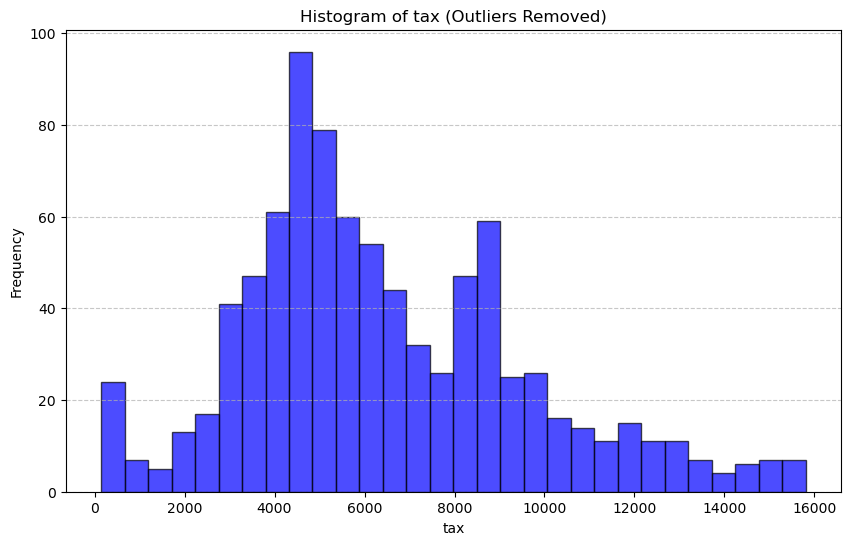

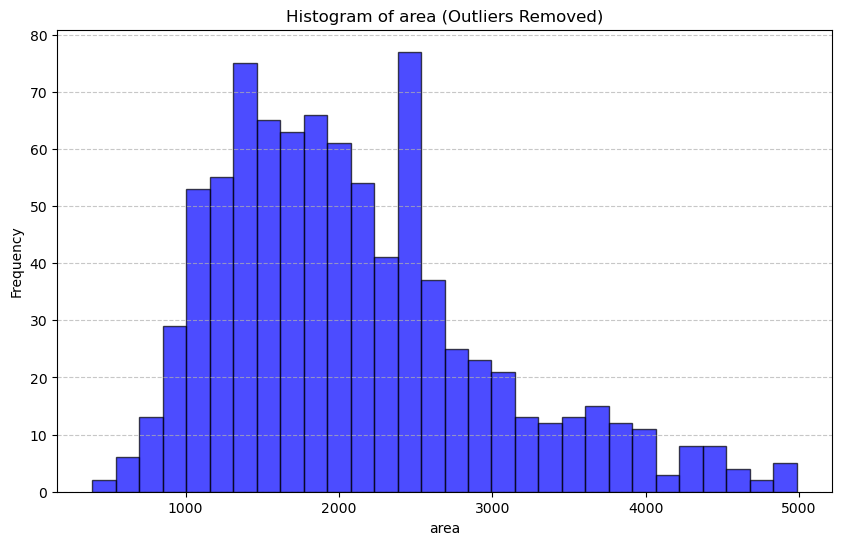

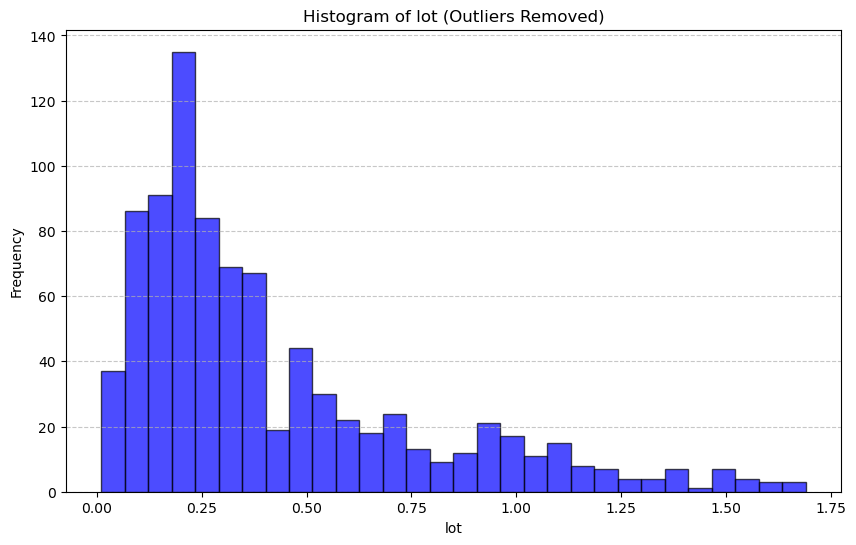

In [262]:
for col in columns_to_process:
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_df[col], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col} (Outliers Removed)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Step 4: Feature Engineering

This section involves creating new features, analyzing correlations, and transforming existing variables to improve the dataset for modeling:

1. **Binary Feature Creation**: A new binary variable, `OnMarketGreaterThan30Days`, is created to indicate whether a house has been on the market for more than 30 days.

2. **Correlation Analysis and Feature Selection**: A correlation matrix is generated, and only features with significant correlations (above a threshold) with `price_sold` or `OnMarketGreaterThan30Days` are retained for further analysis.

3. **Interaction Terms**: New interaction terms are introduced to capture relationships between features, including combinations of bedrooms, bathrooms, area, tax, and market behavior.

4. **Polynomial Transformations**: Key numerical variables are transformed using root, logarithmic, and squared functions to better represent non-linear relationships. Transformations are applied to bedrooms, bathrooms, area, parking, lot size, tax, and house age.

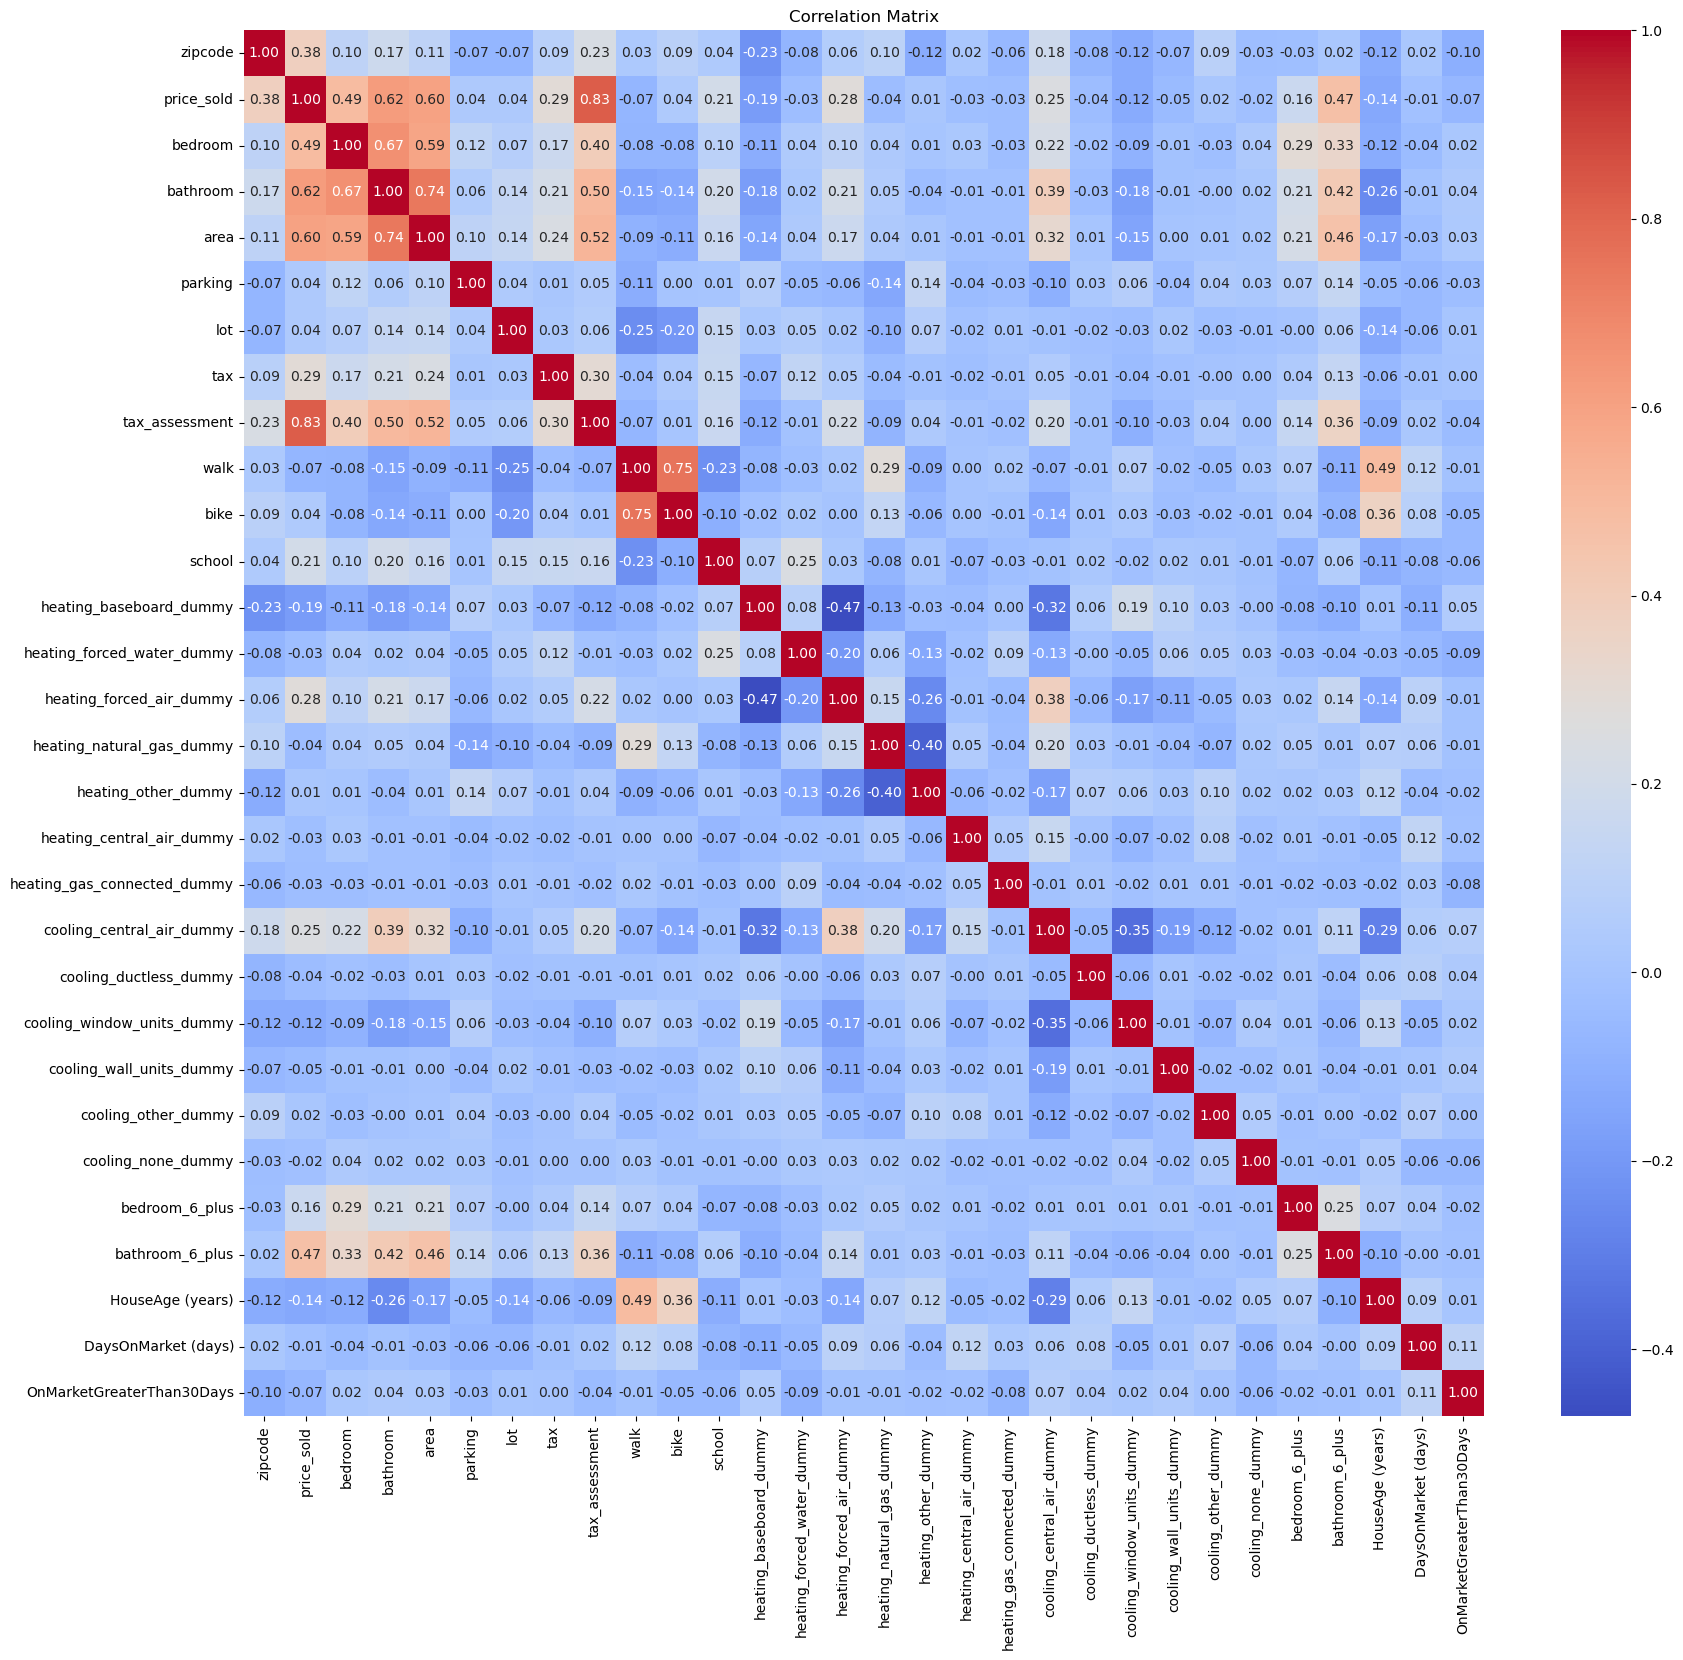

In [ ]:
df['OnMarketGreaterThan30Days'] = (df['DaysOnMarket (days)'] > 30).astype(int)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

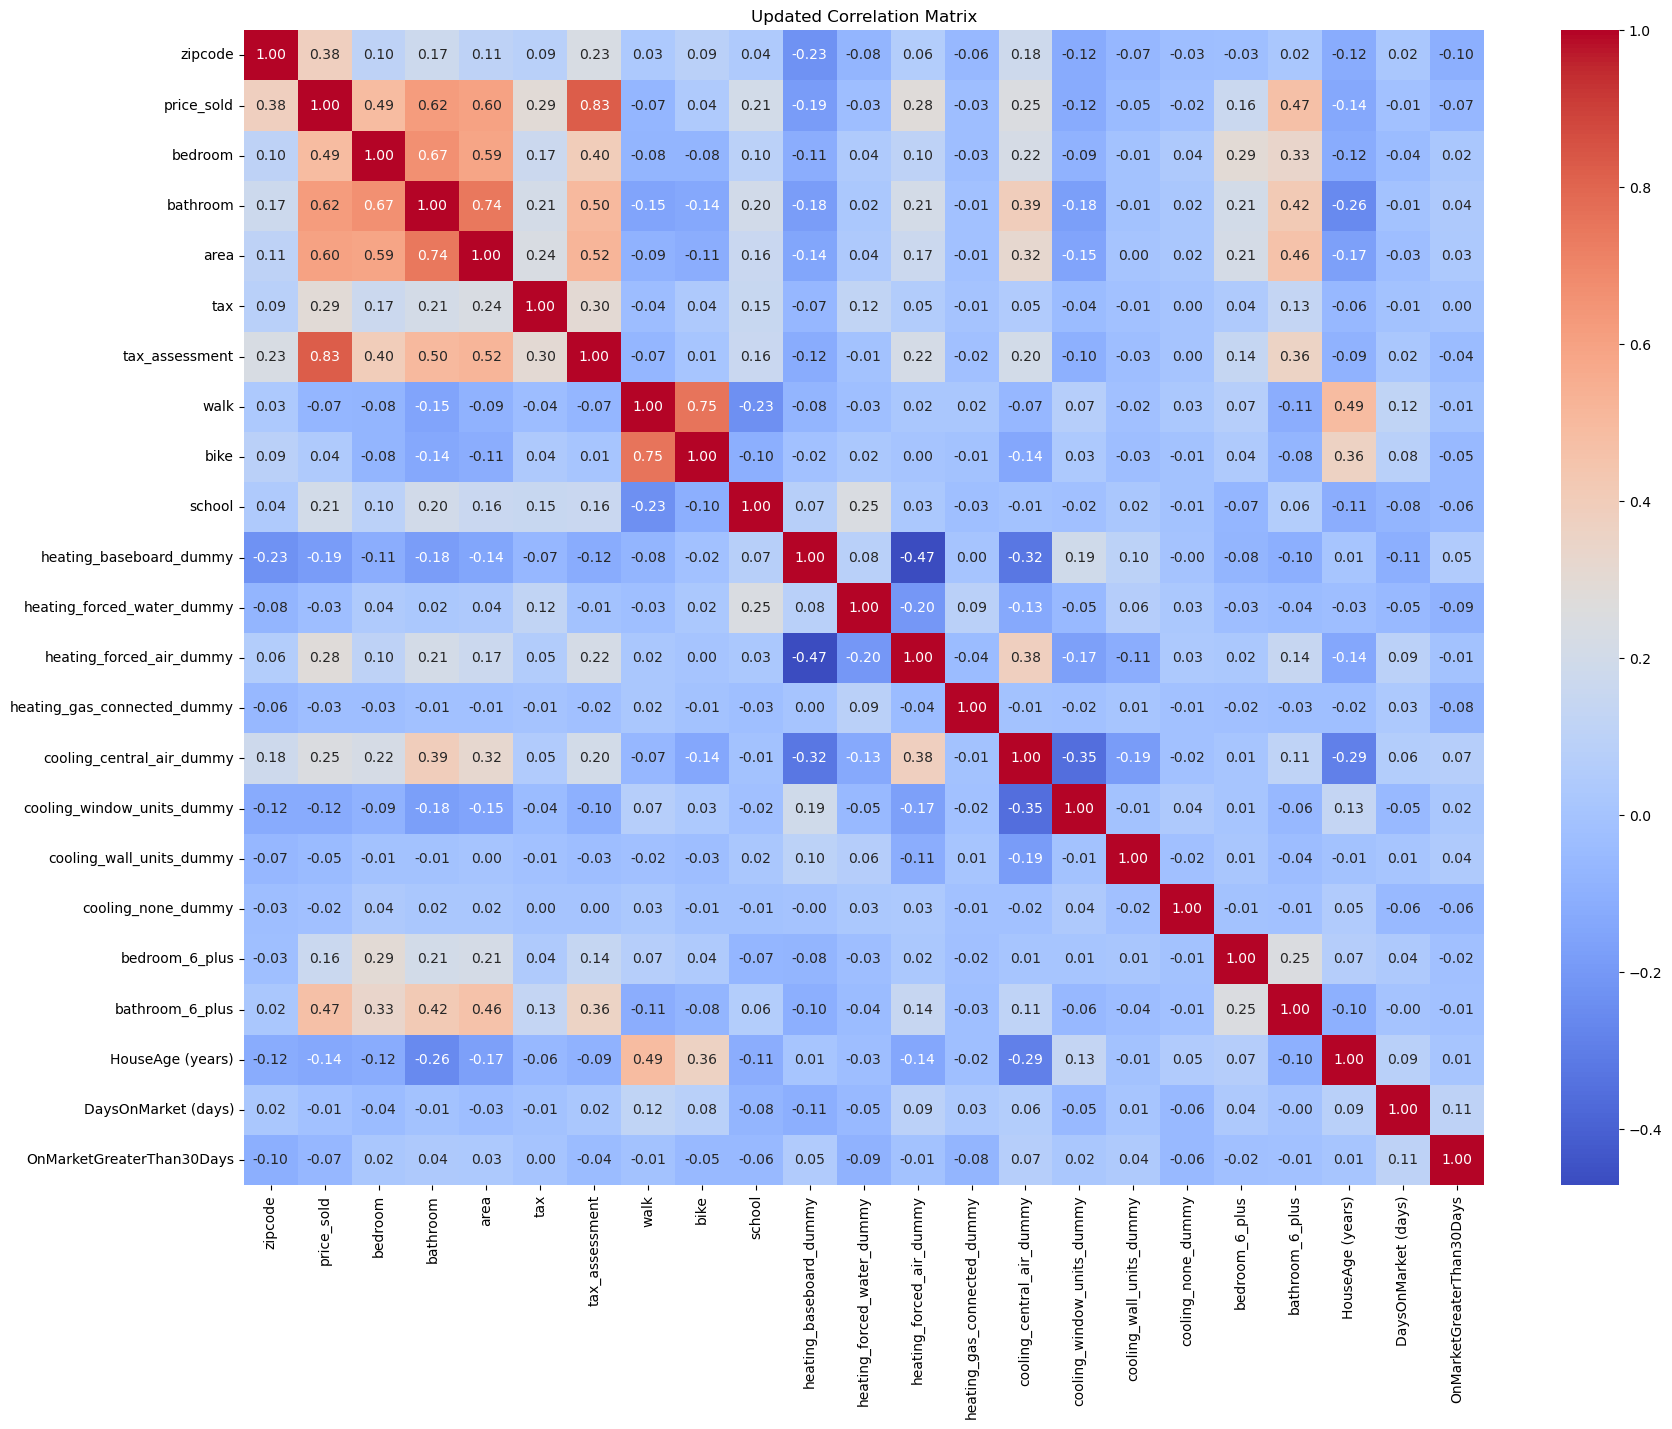

In [ ]:
# Correlation threshold
correlation_threshold = 0.05

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

correlated_with_price = correlation_matrix['price_sold'].abs() > correlation_threshold
correlated_with_onmarket = correlation_matrix['OnMarketGreaterThan30Days'].abs() > correlation_threshold
selected_variables = correlated_with_price | correlated_with_onmarket
columns_to_keep = correlation_matrix.columns[selected_variables]
df_filtered = df[columns_to_keep]

# Recompute and display the updated correlation matrix
updated_correlation_matrix = df_filtered.corr()

# Correlation matrix as heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(updated_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Updated Correlation Matrix")
plt.show()

In [266]:
# Creating specified interaction terms
df['bedroom_bathroom'] = df['bedroom'] * df['bathroom']
df['bedroom_area'] = df['bedroom'] * df['area']
df['bathroom_area'] = df['bathroom'] * df['area']
df['tax_tax_assessment'] = df['tax'] * df['tax_assessment']
df['walk_bike'] = df['walk'] * df['bike']
df['DaysOnMarket_OnMarketGreaterThan30Days'] = df['DaysOnMarket (days)'] * df['OnMarketGreaterThan30Days']
df['bedroom6plus_bathroom6plus'] = df['bedroom_6_plus'] * df['bathroom_6_plus']

In [267]:
# 1. Root and Logarithmic Transformations for Bedroom
df['root_bedroom'] = np.sqrt(df['bedroom'].where(df['bedroom'] >= 0, 0))
df['ln_bedroom'] = np.log(df['bedroom'].replace(0, 1e-9))

# 2. Root and Logarithmic Transformations for Bathroom
df['root_bathroom'] = np.sqrt(df['bathroom'].where(df['bathroom'] >= 0, 0))
df['ln_bathroom'] = np.log(df['bathroom'].replace(0, 1e-9))

# 3. Root and Logarithmic Transformations for Area
df['root_area'] = np.sqrt(df['area'].where(df['area'] >= 0, 0))
df['ln_area'] = np.log(df['area'].replace(0, 1e-9))

# 4. Root and Logarithmic Transformations for Parking
df['root_parking'] = np.sqrt(df['parking'].where(df['parking'] >= 0, 0))
df['ln_parking'] = np.log(df['parking'].replace(0, 1e-9))

# 5. Root and Logarithmic Transformations for Lot
df['root_lot'] = np.sqrt(df['lot'].where(df['lot'] >= 0, 0))
df['ln_lot'] = np.log(df['lot'].replace(0, 1e-9))

# 6. Negative Squared Transformation for Tax
df['negative_squared_tax'] = -1 * (df['tax'] ** 2)

# 7. Negative Root Transformation for HouseAge
df['negative_root_HouseAge'] = -1 * np.sqrt(df['HouseAge (years)'].where(df['HouseAge (years)'] >= 0, 0))

# 8. Negative Logarithmic Transformation for HouseAge
df['negative_ln_HouseAge'] = -1 * np.log(df['HouseAge (years)'].replace(0, 1e-9))

df.head()

,Set,zipcode,price_sold,bedroom,bathroom,area,parking,lot,tax,tax_assessment,walk,bike,school,heating_baseboard_dummy,heating_forced_water_dummy,heating_forced_air_dummy,heating_natural_gas_dummy,heating_other_dummy,heating_central_air_dummy,heating_gas_connected_dummy,cooling_central_air_dummy,cooling_ductless_dummy,cooling_window_units_dummy,cooling_wall_units_dummy,cooling_other_dummy,cooling_none_dummy,bedroom_6_plus,bathroom_6_plus,HouseAge (years),DaysOnMarket (days),OnMarketGreaterThan30Days,bedroom_bathroom,bedroom_area,bathroom_area,tax_tax_assessment,walk_bike,DaysOnMarket_OnMarketGreaterThan30Days,bedroom6plus_bathroom6plus,root_bedroom,ln_bedroom,root_bathroom,ln_bathroom,root_area,ln_area,root_parking,ln_parking,root_lot,ln_lot,negative_squared_tax,negative_root_HouseAge,negative_ln_HouseAge
0,A,1075,320000.0,3,2,1060.0,4.0,0.22,4444.0,253200.0,35.0,31.0,6.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,61,64,1,6,3180.0,2120.0,1.125221e+09,1085.0,64,0,1.732051,1.098612,1.414214,0.693147,32.557641,6.966024,2.000000,1.386294,0.469042,-1.514128,-19749136.0,-7.810250,-4.110874
1,A,1075,338000.0,3,1,1239.0,1.0,0.25,4700.0,267800.0,18.0,21.0,6.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,74,32,1,3,3717.0,1239.0,1.258660e+09,378.0,32,0,1.732051,1.098612,1.000000,0.000000,35.199432,7.122060,1.000000,0.000000,0.500000,-1.386294,-22090000.0,-8.602325,-4.304065
2,A,1075,400000.0,4,2,1482.0,4.0,0.32,4709.0,268300.0,3.0,24.0,6.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,69,56,1,8,5928.0,2964.0,1.263425e+09,72.0,56,0,2.000000,1.386294,1.414214,0.693147,38.496753,7.301148,2.000000,1.386294,0.565685,-1.139434,-22174681.0,-8.306624,-4.234107
3,A,1075,396900.0,3,2,1440.0,2.0,0.57,7345.0,418500.0,25.0,31.0,6.0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,24,85,1,6,4320.0,2880.0,3.073882e+09,775.0,85,0,1.732051,1.098612,1.414214,0.693147,37.947332,7.272398,1.414214,0.693147,0.754983,-0.562119,-53949025.0,-4.898979,-3.178054
4,A,1075,615000.0,4,3,2516.0,2.0,0.57,8749.0,498500.0,6.0,10.0,6.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,37,53,1,12,10064.0,7548.0,4.361376e+09,60.0,53,0,2.000000,1.386294,1.732051,1.098612,50.159745,7.830426,1.414214,0.693147,0.754983,-0.562119,-76545001.0,-6.082763,-3.610918


# Step 5: Model Development

This section focuses on developing and evaluating machine learning models for predicting house-related outcomes.

1. **Linear Regression**: A linear regression model is developed to predict `price_sold`. The dataset is split into training and testing sets, and evaluation metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Adjusted R² are calculated to assess model performance.

2. **Feature Selection with Lasso Regularization**: Lasso regularization is applied to select the most relevant features. A scaled version of the training data is used to identify features with non-zero coefficients, and the linear regression model is retrained using only the selected features. Evaluation metrics are recalculated to compare performance.

3. **Logistic Regression**: A logistic regression model is built to predict whether a house will be sold within 30 days (`OnMarketGreaterThan30Days`). The data is standardized, and the model is evaluated using accuracy, precision, recall, F1-Score, and the AUC-ROC score. A confusion matrix and classification report are also provided for further insights.

4. **Decision Tree Classifier**: A decision tree model is developed for the same classification problem (`OnMarketGreaterThan30Days`). The model performance is evaluated using the same metrics as logistic regression, including accuracy, precision, recall, F1-Score, and AUC-ROC, along with a confusion matrix and classification report.

In [ ]:
# Features and target variable
features = ['root_bedroom', 'ln_bedroom', 'root_bathroom', 'ln_bathroom',
            'root_area', 'ln_area', 'negative_squared_tax', 'negative_root_HouseAge', 
            'negative_ln_HouseAge', 'bedroom_bathroom', 'bedroom_area', 'bathroom_area',
            'tax_tax_assessment', 'walk_bike', 'bedroom6plus_bathroom6plus',
            'cooling_ductless_dummy', 'cooling_window_units_dummy', 'cooling_wall_units_dummy',
            'cooling_other_dummy', 'cooling_none_dummy', 'bedroom_6_plus', 'bathroom_6_plus',
            'heating_forced_air_dummy', 'heating_natural_gas_dummy', 'heating_other_dummy',
            'heating_central_air_dummy', 'heating_gas_connected_dummy', 'cooling_central_air_dummy',
            'heating_baseboard_dummy', 'heating_forced_water_dummy', 'tax', 'tax_assessment',
            'walk', 'bike', 'school']

target = 'price_sold'

# Training and testing sets split
X = df[features]
y = df[target]

# Drop rows with missing values
X = X.dropna()
y = y.loc[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

adj_r2_train = adjusted_r2(r2_train, X_train.shape[0], X_train.shape[1])
adj_r2_test = adjusted_r2(r2_test, X_test.shape[0], X_test.shape[1])

print("Model 1: Without Lasso Regularization\n")

# Print evaluation metrics
print("Training Metrics:")
print(f"MAE: {mae_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R²: {r2_train:.2f}")
print(f"Adjusted R²: {adj_r2_train:.2f}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²: {r2_test:.2f}")
print(f"Adjusted R²: {adj_r2_test:.2f}")

Model 1: Without Lasso Regularization

Training Metrics:
MAE: 329116.84
RMSE: 586061.64
R²: 0.78
Adjusted R²: 0.77

Testing Metrics:
MAE: 327159.91
RMSE: 519737.68
R²: 0.84
Adjusted R²: 0.81


In [ ]:
X = df.drop(columns=['Set', 'zipcode', 'price_sold'], errors='ignore')
y = df['price_sold']

# Keep only numeric columns
X = X.select_dtypes(include=['float64', 'int64']).dropna()
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Use LassoCV to select the best features
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=10000).fit(X_train_scaled, y_train)

optimal_features_mask = lasso_cv.coef_ != 0
optimal_features = X_train.columns[optimal_features_mask]

print("Optimal Features Selected by Lasso:")
print(list(optimal_features))

# Step 2: Rerun Linear Regression with optimal features
X_train_opt = X_train[optimal_features]
X_test_opt = X_test[optimal_features]

X_train_opt_scaled = scaler.fit_transform(X_train_opt)
X_test_opt_scaled = scaler.transform(X_test_opt)

model = LinearRegression()
model.fit(X_train_opt_scaled, y_train)

y_train_pred = model.predict(X_train_opt_scaled)
y_test_pred = model.predict(X_test_opt_scaled)

# Step 3: Evaluate the model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Adjusted R² calculation
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

adj_r2_train = adjusted_r2(r2_train, X_train_opt.shape[0], X_train_opt.shape[1])
adj_r2_test = adjusted_r2(r2_test, X_test_opt.shape[0], X_test_opt.shape[1])

print("\nModel 2: With Lasso Regularization\n")

# Print evaluation metrics
print("Training Metrics:")
print(f"MAE: {mae_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R²: {r2_train:.2f}")
print(f"Adjusted R²: {adj_r2_train:.2f}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²: {r2_test:.2f}")
print(f"Adjusted R²: {adj_r2_test:.2f}")

Optimal Features Selected by Lasso:
['parking', 'tax_assessment', 'walk', 'bike', 'school', 'heating_baseboard_dummy', 'heating_forced_water_dummy', 'heating_forced_air_dummy', 'heating_central_air_dummy', 'heating_gas_connected_dummy', 'cooling_ductless_dummy', 'cooling_wall_units_dummy', 'cooling_none_dummy', 'bathroom_6_plus', 'bedroom_bathroom', 'bathroom_area', 'tax_tax_assessment', 'walk_bike', 'DaysOnMarket_OnMarketGreaterThan30Days', 'bedroom6plus_bathroom6plus', 'root_lot', 'negative_ln_HouseAge']

Model 2: With Lasso Regularization

Training Metrics:
MAE: 330649.53
RMSE: 586162.78
R²: 0.78
Adjusted R²: 0.77

Testing Metrics:
MAE: 333702.36
RMSE: 528073.76
R²: 0.83
Adjusted R²: 0.82


In [ ]:
# Define the features and target variable
target = 'OnMarketGreaterThan30Days'
X = df.drop(columns=['Set', 'zipcode', target], errors='ignore')
y = df[target]

# Numeric columns
X = X.select_dtypes(include=['float64', 'int64']).dropna()
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)
y_test_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc_roc = roc_auc_score(y_test, y_test_pred_proba)

# Print Evaluation Metrics
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Logistic Regression Model Performance:
Accuracy: 0.9070
Precision: 0.9112
Recall: 0.9949
F1-Score: 0.9512
AUC-ROC: 0.6917

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.91      0.99      0.95       196

    accuracy                           0.91       215
   macro avg       0.46      0.50      0.48       215
weighted avg       0.83      0.91      0.87       215

Confusion Matrix:
[[  0  19]
 [  1 195]]


In [ ]:
# Define the features and target variable
target = 'OnMarketGreaterThan30Days'
X = df.drop(columns=['Set', 'zipcode', target], errors='ignore')
y = df[target]

# Numeric columns
X = X.select_dtypes(include=['float64', 'int64']).dropna()
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_model.fit(X_train, y_train)

# Make predictions
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)
y_test_pred_proba = tree_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc_roc = roc_auc_score(y_test, y_test_pred_proba)

# Print Evaluation Metrics
print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Decision Tree Classifier Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
AUC-ROC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00       196

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215

Confusion Matrix:
[[ 19   0]
 [  0 196]]
